# <font color='red'>Depression, Axiety and Stress prediction</font>

## <font color='blue'>Introduction</font>

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import function as fn

## <font color='blue'>Loading the dataframe</font>

In [2]:
data = fn.analysis_df()

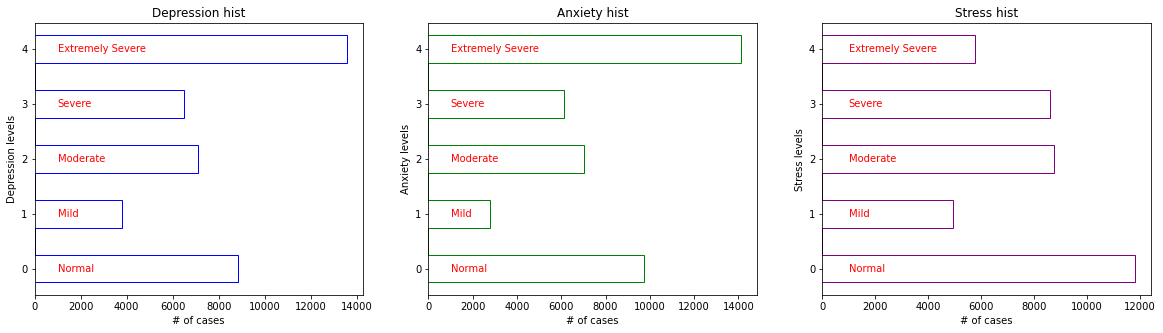

In [3]:
fn.show_data(data)

## <font color='blue'>Linear Regression Classification</font>

X, Y train/test shape
(31820, 42)
(7955, 42)
(31820, 3)
(7955, 3)


The model performance for training set
--------------------------------------
RMSE is 0.4888746664746007
R2 score is 0.9000837310704531


The model performance for testing set
--------------------------------------
RMSE is 0.48788844240047335
R2 score is 0.8993837194195312


The best cuts and the performances
- Depression
4.2 0.718541797611565
- Anxiety
3.9 0.572972972972973
- Stress
4.1 0.8580766813324953


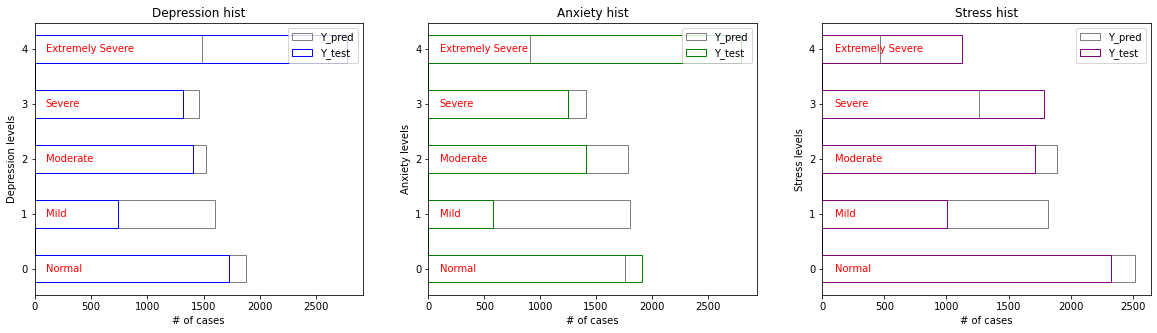

In [4]:
fn.linear_regression(data)

## <font color='blue'>Logistic Regression Classification</font>